In [1]:
import pandas as pd
import numpy as np
import kagglehub as kagglehub
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

d:\OJCommerce Case Study\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# path = kagglehub.dataset_download("bhanuthakurr/cleaned-contoso-dataset")

# print("Path to dataset files:", path)

In [2]:
employee_df= pd.read_csv(r"D:\OJCommerce Case Study\cleaned-contoso-dataset\versions\8\DimEmployee.csv")

In [3]:
display(employee_df.head())

,EmployeeKey,ParentEmployeeKey,FirstName,LastName,Title,HireDate,BirthDate,EmailAddress,Phone,EmergencyContactName,EmergencyContactPhone,Gender,PayFrequency,BaseRate,VacationHours,DepartmentName,StartDate,Status,SalaryStatus,IsSalesPerson,IsMarried
0,1,18,Kim,Abercrombie,Sales Region Manager,1996-07-31,1972-05-15,guy1@contoso.com,320-555-0195,Hazem Abolrous,320-555-0195,Male,2,72.45,40,Production,1996-07-31,Current,Not Salaried,No,Yes
1,2,18,Sagiv,Hadaya,Sales Region Manager,1997-02-26,1977-06-03,kevin0@contoso.com,150-555-0189,Kevin Cook,150-555-0189,Male,2,72.45,40,Marketing,1997-02-26,Current,Not Salaried,No,No
2,3,18,Luka,Abrus,Sales Region Manager,1997-12-12,1964-12-13,roberto0@contoso.com,212-555-0187,Ahmad Abu-Dayah,212-555-0187,Male,2,72.45,40,Engineering,1997-12-12,Current,Salaried,No,Yes
3,4,18,Kirk,Nason,Sales Region Manager,1998-01-05,1965-01-23,KirkNason@contoso.com,612-555-0100,Mrina Natarajan,612-555-0100,Male,2,72.45,40,Tool Design,1998-01-05,Current,Not Salaried,No,No
4,5,18,Humberto,Acevedo,Sales Region Manager,1998-01-05,1965-01-23,Humberto@contoso.com,612-555-0100,Gustavo Achong,612-555-0100,Male,2,72.45,40,Tool Design,2000-06-30,Current,Not Salaried,No,No


In [4]:
duplicate_counts = employee_df.apply(lambda x: x.duplicated().sum())
print(duplicate_counts)

EmployeeKey                0
ParentEmployeeKey        282
FirstName                 59
LastName                   5
Title                    289
HireDate                 129
BirthDate                 17
EmailAddress               0
Phone                      8
EmergencyContactName       0
EmergencyContactPhone      8
Gender                   291
PayFrequency             291
BaseRate                 289
VacationHours            194
DepartmentName           276
StartDate                123
Status                   292
SalaryStatus             291
IsSalesPerson            291
IsMarried                291
dtype: int64


In [5]:
employee_df.shape

(293, 21)

In [6]:
geography_df= pd.read_csv(r"D:\OJCommerce Case Study\cleaned-contoso-dataset\versions\8\DimGeography.csv")

In [7]:
duplicate_counts = geography_df.apply(lambda x: x.duplicated().sum())
print(duplicate_counts)

GeographyKey           0
GeographyType        670
ContinentName        671
CityName             162
StateProvinceName    547
RegionCountryName    638
dtype: int64


In [8]:
display(geography_df.head())

,GeographyKey,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName
0,1,Continent,Asia,NaN,NaN,NaN
1,2,Continent,Europe,NaN,NaN,NaN
2,3,Continent,North America,NaN,NaN,NaN
3,269,Country/Region,Asia,NaN,NaN,Armenia
4,270,Country/Region,Asia,NaN,NaN,Australia


In [9]:
geography_df.shape

(674, 6)

In [10]:
geography_df= geography_df[geography_df['RegionCountryName'] == 'United States']

In [11]:
geography_df.shape

(312, 6)

In [ ]:
# unique values for each column
unique_values = {column: geography_df[column].unique() for column in geography_df.columns}

# unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in column '{column}':")
    print(values)
    print()

Unique values in column 'GeographyKey':
[302 366 369 370 371 372 373 374 375 376 379 380 381 382 383 386 390 392
 394 396 397 401 406 408 409 411 415 417 421 422 424 430 431 432 433 434
 436 438 440 441 442 443 444 445 448 450 451 452 453 455 457 458 460 461
 462 463 464 465 466 469 470 472 475 479 488 494 495 500 502 505 507 508
 516 520 522 523 527 535 536 537 538 546 547 551 552 559 560 566 570 573
 575 577 578 579 580 581 582 583 584 593 594 597 600 601 602 603 604 605
 606 607 609 610 611 612 614 617 618 619 620 625 627 631 633 642 643 644
 645 652 653 658 660 667 670 677 678 686 688 689 690 691 693 694 703 707
 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799
 800 801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817
 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835
 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853
 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871
 872 873 87

In [13]:
store_df= pd.read_csv(r"D:\OJCommerce Case Study\cleaned-contoso-dataset\versions\8\DimStore.csv")

In [14]:
store_df.head()

,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,Status,OpenDate,CloseDate,EntityKey,StorePhone,StoreFax,CloseReason,EmployeeCount,SellingAreaSize,LastRemodelDate,EmployeeKey
0,1,693,35,Store,Contoso Seattle No.1 Store,On,2004-04-12,2090-12-31,635,320-555-0195,320-555-0195,Not Yet Closed,17,462,2009-06-16 00:00:00,35
1,2,693,35,Store,Contoso Seattle No.2 Store,On,2004-02-14,2090-12-31,636,150-555-0189,150-555-0189,Not Yet Closed,25,700,2009-06-17 00:00:00,35
2,3,856,36,Store,Contoso Kennewick Store,On,2004-02-12,2090-12-31,934,212-555-0187,212-555-0187,Not Yet Closed,26,680,2009-06-18 00:00:00,36
3,4,424,37,Store,Contoso Bellevue Store,On,2004-03-01,2090-12-31,638,612-555-0100,612-555-0100,Not Yet Closed,19,455,2009-06-16 00:00:00,37
4,5,677,38,Store,Contoso Redmond Store,On,2004-04-02,2090-12-31,639,612-555-0100,612-555-0100,Not Yet Closed,33,560,2009-06-17 00:00:00,38


In [15]:
store_df.shape 

(306, 16)

In [16]:
merged_df = pd.merge(employee_df, store_df, on=['EmployeeKey','EmployeeKey'], how='left')

In [17]:
merged_df.shape

(337, 36)

In [18]:
merged_df.head()

,EmployeeKey,ParentEmployeeKey,FirstName,LastName,Title,HireDate,BirthDate,EmailAddress,Phone,EmergencyContactName,EmergencyContactPhone,Gender,PayFrequency,BaseRate,VacationHours,DepartmentName,StartDate,Status_x,SalaryStatus,IsSalesPerson,IsMarried,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,Status_y,OpenDate,CloseDate,EntityKey,StorePhone,StoreFax,CloseReason,EmployeeCount,SellingAreaSize,LastRemodelDate
0,1,18,Kim,Abercrombie,Sales Region Manager,1996-07-31,1972-05-15,guy1@contoso.com,320-555-0195,Hazem Abolrous,320-555-0195,Male,2,72.45,40,Production,1996-07-31,Current,Not Salaried,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,18,Sagiv,Hadaya,Sales Region Manager,1997-02-26,1977-06-03,kevin0@contoso.com,150-555-0189,Kevin Cook,150-555-0189,Male,2,72.45,40,Marketing,1997-02-26,Current,Not Salaried,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,18,Luka,Abrus,Sales Region Manager,1997-12-12,1964-12-13,roberto0@contoso.com,212-555-0187,Ahmad Abu-Dayah,212-555-0187,Male,2,72.45,40,Engineering,1997-12-12,Current,Salaried,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,18,Kirk,Nason,Sales Region Manager,1998-01-05,1965-01-23,KirkNason@contoso.com,612-555-0100,Mrina Natarajan,612-555-0100,Male,2,72.45,40,Tool Design,1998-01-05,Current,Not Salaried,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18,Humberto,Acevedo,Sales Region Manager,1998-01-05,1965-01-23,Humberto@contoso.com,612-555-0100,Gustavo Achong,612-555-0100,Male,2,72.45,40,Tool Design,2000-06-30,Current,Not Salaried,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
merged_df= merged_df.dropna()

In [20]:
final_df= pd.merge(merged_df, geography_df, on = ['GeographyKey','GeographyKey'], how='left')

In [21]:
final_df.nunique()

EmployeeKey              261
ParentEmployeeKey          5
FirstName                217
LastName                 257
Title                      1
HireDate                 143
BirthDate                248
EmailAddress             261
Phone                    256
EmergencyContactName     261
EmergencyContactPhone    256
Gender                     2
PayFrequency               2
BaseRate                   1
VacationHours             99
DepartmentName            16
StartDate                146
Status_x                   1
SalaryStatus               2
IsSalesPerson              2
IsMarried                  2
StoreKey                 305
GeographyKey             262
StoreManager             261
StoreType                  4
StoreName                305
Status_y                   2
OpenDate                 165
CloseDate                  8
EntityKey                305
StorePhone               294
StoreFax                 294
CloseReason                3
EmployeeCount             46
SellingAreaSiz

In [22]:
salesdf = pd.read_csv(r"D:\OJCommerce Case Study\cleaned-contoso-dataset\versions\8\FactSales.csv")

In [23]:
salesdf.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
0,1,2007-01-02,1,209,956,10,1,91.05,198.00,8,0,0.00,1,39.60,728.40,1544.40
1,2,2007-02-12,4,308,766,2,1,10.15,19.90,4,0,0.00,1,0.99,40.60,78.61
2,3,2008-01-24,1,156,1175,11,1,209.03,410.00,9,0,0.00,3,61.50,1881.27,3628.50
3,4,2008-01-13,2,306,1429,10,1,132.90,289.00,8,0,0.00,1,57.80,1063.20,2254.20
4,5,2008-01-22,2,306,1133,10,1,144.52,436.20,24,0,0.00,3,261.72,3468.48,10207.08


In [24]:
aggregated_sales = salesdf.groupby('StoreKey')['SalesAmount'].sum().reset_index()

In [25]:
aggregated_sales.shape

(306, 2)

In [27]:
final_df = pd.merge(final_df, aggregated_sales, on=['StoreKey','StoreKey'], how='left')

In [28]:
final_df.head()

,EmployeeKey,ParentEmployeeKey,FirstName,LastName,Title,HireDate,BirthDate,EmailAddress,Phone,EmergencyContactName,EmergencyContactPhone,Gender,PayFrequency,BaseRate,VacationHours,DepartmentName,StartDate,Status_x,SalaryStatus,IsSalesPerson,IsMarried,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,Status_y,OpenDate,CloseDate,EntityKey,StorePhone,StoreFax,CloseReason,EmployeeCount,SellingAreaSize,LastRemodelDate,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,SalesAmount
0,14,8,Miguel,Saenz,Sales Store Manager,1998-03-03,1961-09-01,terri0@contoso.com,819-555-0175,Peter Saddow,819-555-0175,Female,2,25.00,40,Engineering,1998-03-03,Current,Salaried,No,No,304.00,772.00,14.00,Store,Contoso Saint Petersburg Store,On,2004-06-07,2090-12-31,942.00,510-555-0118,517-555-0118,Not Yet Closed,95.00,480.00,2009-06-19 00:00:00,NaN,NaN,NaN,NaN,NaN,21129080.21
1,15,9,Kim,Akers,Sales Store Manager,1998-03-05,1946-10-01,sidney0@contoso.com,424-555-0189,Cigdem Akin,424-555-0189,Male,2,25.00,40,Production,1998-03-05,Current,Not Salaried,No,Yes,305.00,768.00,15.00,Store,Contoso Nizhny Novgorod Store,On,2004-03-15,2090-12-31,944.00,511-555-0119,511-555-0119,Not Yet Closed,95.00,480.00,2009-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,21349251.21
2,24,9,Ming-Yang,Xie,Sales Store Manager,1999-01-03,1952-10-14,stuart0@contoso.com,413-555-0136,Stig Panduro,413-555-0136,Male,2,25.00,40,Production,1999-01-03,Current,Not Salaried,No,No,302.00,729.00,24.00,Store,Contoso Taipei Store,On,2004-07-19,2090-12-31,935.00,830-555-0128,830-555-0128,Not Yet Closed,95.00,480.00,2009-06-18 21:00:00,NaN,NaN,NaN,NaN,NaN,37610056.38
3,25,10,Antonio,Alwan,Sales Store Manager,1999-01-03,1960-11-18,greg0@contoso.com,332-555-0150,Kamil Amireh,332-555-0150,Male,2,25.00,40,Production,1999-01-03,Current,Not Salaried,No,No,303.00,757.00,25.00,Store,Contoso Lisbon Store,On,2004-09-20,2090-12-31,936.00,290-666-8960,290-666-8960,Not Yet Closed,95.00,480.00,2009-06-18 22:00:00,NaN,NaN,NaN,NaN,NaN,21451249.58
4,35,10,Roy,Antebi,Sales Store Manager,1999-01-08,1973-08-27,jianshuo0@contoso.com,952-555-0178,Johnson Apacible,952-555-0178,Male,1,25.00,38,Production,1999-01-08,Current,Not Salaried,No,No,1.00,693.00,35.00,Store,Contoso Seattle No.1 Store,On,2004-04-12,2090-12-31,635.00,320-555-0195,320-555-0195,Not Yet Closed,17.00,462.00,2009-06-16 00:00:00,City,North America,Seattle,Washington,United States,22994925.17


In [29]:
final_df.shape

(305, 42)

In [30]:
duplicate_counts = final_df.apply(lambda x: x.duplicated().sum())
print(duplicate_counts)

EmployeeKey               44
ParentEmployeeKey        300
FirstName                 88
LastName                  48
Title                    304
HireDate                 162
BirthDate                 57
EmailAddress              44
Phone                     49
EmergencyContactName      44
EmergencyContactPhone     49
Gender                   303
PayFrequency             303
BaseRate                 304
VacationHours            206
DepartmentName           289
StartDate                159
Status_x                 304
SalaryStatus             303
IsSalesPerson            303
IsMarried                303
StoreKey                   0
GeographyKey              43
StoreManager              44
StoreType                301
StoreName                  0
Status_y                 303
OpenDate                 140
CloseDate                297
EntityKey                  0
StorePhone                11
StoreFax                  11
CloseReason              302
EmployeeCount            259
SellingAreaSiz

In [31]:
employees_assigned_more_than_one_store = final_df.groupby('EmployeeKey').filter(lambda x: len(x) > 1)
employees_assigned_more_than_one_store.shape

(81, 42)

In [32]:
employees_assigned_more_than_one_store.groupby('EmployeeKey')['SalesAmount'].sum().reset_index().sort_values('SalesAmount', ascending=False)

,EmployeeKey,SalesAmount
35,292,1470422138.07
23,246,811384620.51
0,35,673832304.85
22,233,544295276.49
8,88,90672432.14
36,294,75648671.60
26,274,75216959.32
32,281,74327858.71
30,278,73812484.67
34,290,73616965.32


In [33]:
temp_df= final_df.groupby('EmployeeKey')['SalesAmount'].sum().reset_index().sort_values('SalesAmount', ascending=False)


In [ ]:
temp_df = final_df.groupby('EmployeeKey', as_index=False).agg(
    TotalSales=('SalesAmount', 'sum'))

In [35]:
# Merge the aggregated result back with the original DataFrame
merged_df = pd.merge(final_df, temp_df, on='EmployeeKey')

In [36]:
merged_df = merged_df.sort_values('TotalSales', ascending=False)

In [37]:
store_counts = merged_df.groupby('EmployeeKey')['StoreKey'].nunique().reset_index()
store_counts.rename(columns={'StoreKey': 'NumberOfStores'}, inplace=True)

# Merge the store counts back into the merged_df
merged_df = pd.merge(merged_df, store_counts, on='EmployeeKey', how='left')

In [ ]:
merged_df.head(10)

   EmployeeKey  ParentEmployeeKey FirstName  LastName                Title  \
0          292                  7     Nuria  Gonzalez  Sales Store Manager   
1          292                  7     Nuria  Gonzalez  Sales Store Manager   
2          292                  7     Nuria  Gonzalez  Sales Store Manager   
3          213                 10       Jan     Dryml  Sales Store Manager   
4          212                 10       Ben     Smith  Sales Store Manager   
5          246                  6     Kelly   Weadock  Sales Store Manager   
6          246                  6     Kelly   Weadock  Sales Store Manager   
7           35                 10       Roy    Antebi  Sales Store Manager   
8           35                 10       Roy    Antebi  Sales Store Manager   
9           35                 10       Roy    Antebi  Sales Store Manager   

     HireDate   BirthDate           EmailAddress                Phone  \
0  2002-07-01  1965-10-31    ranjit0@contoso.com  1 (11) 500 555-011

In [38]:
merged_df= merged_df[merged_df['RegionCountryName']=='United States']

In [39]:
merged_df.head()

,EmployeeKey,ParentEmployeeKey,FirstName,LastName,Title,HireDate,BirthDate,EmailAddress,Phone,EmergencyContactName,EmergencyContactPhone,Gender,PayFrequency,BaseRate,VacationHours,DepartmentName,StartDate,Status_x,SalaryStatus,IsSalesPerson,IsMarried,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,Status_y,OpenDate,CloseDate,EntityKey,StorePhone,StoreFax,CloseReason,EmployeeCount,SellingAreaSize,LastRemodelDate,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,SalesAmount,TotalSales,NumberOfStores
3,213,10,Jan,Dryml,Sales Store Manager,1999-04-06,1964-12-16,jan0@contoso.com,139-555-0131,Dominik Dubicki,139-555-0131,Male,1,25.00,30,Production,1999-04-06,Current,Not Salaried,No,No,200.00,894.00,213.00,Catalog,Contoso Catalog Store,On,2004-10-26,2090-12-31,58.00,278-555-0118,278-555-0118,Not Yet Closed,120.00,462.00,2009-06-17 00:00:00,City,North America,North Harford,Maryland,United States,1078007547.23,1078007547.23,1
4,212,10,Ben,Smith,Sales Store Manager,1999-04-06,1966-03-14,jay0@contoso.com,407-555-0165,Denise Smith,407-555-0165,Male,1,25.00,32,Production,1999-04-06,Current,Not Salaried,No,No,199.00,800.00,212.00,Online,Contoso North America Online Store,On,2004-08-25,2090-12-31,59.00,450-555-0152,450-555-0152,Not Yet Closed,325.00,500.00,2009-06-16 00:00:00,City,North America,Bethesda,Maryland,United States,984249404.25,984249404.25,1
7,35,10,Roy,Antebi,Sales Store Manager,1999-01-08,1973-08-27,jianshuo0@contoso.com,952-555-0178,Johnson Apacible,952-555-0178,Male,1,25.00,38,Production,1999-01-08,Current,Not Salaried,No,No,308.00,693.00,35.00,Reseller,Contoso North America Reseller,On,2004-03-08,2090-12-31,947.00,55-555-0118,55-555-0118,Not Yet Closed,15.00,450.00,2008-06-05 00:00:00,City,North America,Seattle,Washington,United States,628168708.52,673832304.85,3
8,35,10,Roy,Antebi,Sales Store Manager,1999-01-08,1973-08-27,jianshuo0@contoso.com,952-555-0178,Johnson Apacible,952-555-0178,Male,1,25.00,38,Production,1999-01-08,Current,Not Salaried,No,No,1.00,693.00,35.00,Store,Contoso Seattle No.1 Store,On,2004-04-12,2090-12-31,635.00,320-555-0195,320-555-0195,Not Yet Closed,17.00,462.00,2009-06-16 00:00:00,City,North America,Seattle,Washington,United States,22994925.17,673832304.85,3
9,35,10,Roy,Antebi,Sales Store Manager,1999-01-08,1973-08-27,jianshuo0@contoso.com,952-555-0178,Johnson Apacible,952-555-0178,Male,1,25.00,38,Production,1999-01-08,Current,Not Salaried,No,No,2.00,693.00,35.00,Store,Contoso Seattle No.2 Store,On,2004-02-14,2090-12-31,636.00,150-555-0189,150-555-0189,Not Yet Closed,25.00,700.00,2009-06-17 00:00:00,City,North America,Seattle,Washington,United States,22668671.16,673832304.85,3


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming merged_df is your final DataFrame with TotalSales, SellingAreaSize, and EmployeeCount columns

# Invert SellingAreaSize and EmployeeCount so that lower values are better
merged_df['SellingAreaSizeInv'] = 1 / merged_df['SellingAreaSize']
merged_df['EmployeeCountInv'] = 1 / merged_df['EmployeeCount']
merged_df['NumberOfStoresInv'] = 1 / merged_df['NumberOfStores']

# Normalize the values
scaler = MinMaxScaler()
merged_df[['TotalSalesNorm', 'SellingAreaSizeNorm', 'EmployeeCountNorm', 'NumberOfStoresNorm']] = scaler.fit_transform(
    merged_df[['TotalSales', 'SellingAreaSizeInv', 'EmployeeCountInv', 'NumberOfStoresInv']]
)

# Calculate the composite score
merged_df['CompositeScore'] = merged_df['TotalSalesNorm'] + merged_df['SellingAreaSizeNorm'] + merged_df['EmployeeCountNorm'] + merged_df['NumberOfStoresNorm']

# Sort the DataFrame based on the composite score
top_performing_managers = merged_df.sort_values('CompositeScore', ascending=False)

# Display the top performing managers
#print(top_performing_managers[['EmployeeKey', 'TotalSales', 'SellingAreaSize', 'EmployeeCount', 'CompositeScore']].head(30))

     EmployeeKey    TotalSales  SellingAreaSize  EmployeeCount  CompositeScore
3            213 1078007547.23           462.00         120.00            3.04
133           55   22929282.37           460.00          17.00            2.86
146          162   22865828.19           460.00          17.00            2.86
156          110   22827419.95           460.00          17.00            2.86
166          184   22749932.22           460.00          17.00            2.86
182          206   22624458.31           460.00          17.00            2.86
210          124   22450191.16           460.00          17.00            2.86
229           41   22273861.20           460.00          17.00            2.86
240          142   21988879.61           460.00          17.00            2.86
122           84   23061108.66           462.00          17.00            2.85
141          169   22882255.64           462.00          17.00            2.85
164          177   22770052.11           462.00     


Question:
Contoso would like to offer managerial training programs for top performers and sales
strategy training programs for other store managers who require them and are in the
US Geographical Area. Could you please make recommendations as to who needs the
former and who needs the latter and justify your choices with facts and figures.

Answer:
a. If we purely only at the Sales figures then the top performing store managers are Jan Dryml, Ben Smith and Roy Antebi are best performing store managers and could be given the managerial training programs, but looking at purely the performance Jan Dryml, Ed Banti, Kelly Rollin, Michel Periera, Michiyo Sato , Ashima	Singhal, Ekaterina	Podkolzina, Ties Arts and April	Reagan can be offered the Managerial training programs.
b. While other store managers in the US region can be given the Strategy Training Program.


In [62]:
merged_df = merged_df.sort_values('TotalSales', ascending=False)
merged_df.head(3)

,EmployeeKey,ParentEmployeeKey,FirstName,LastName,Title,HireDate,BirthDate,EmailAddress,Phone,EmergencyContactName,EmergencyContactPhone,Gender,PayFrequency,BaseRate,VacationHours,DepartmentName,StartDate,Status_x,SalaryStatus,IsSalesPerson,IsMarried,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,Status_y,OpenDate,CloseDate,EntityKey,StorePhone,StoreFax,CloseReason,EmployeeCount,SellingAreaSize,LastRemodelDate,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,SalesAmount,TotalSales,NumberOfStores,SellingAreaSizeInv,EmployeeCountInv,NumberOfStoresInv,TotalSalesNorm,SellingAreaSizeNorm,EmployeeCountNorm,NumberOfStoresNorm,CompositeScore
3,213,10,Jan,Dryml,Sales Store Manager,1999-04-06,1964-12-16,jan0@contoso.com,139-555-0131,Dominik Dubicki,139-555-0131,Male,1,25.00,30,Production,1999-04-06,Current,Not Salaried,No,No,200.00,894.00,213.00,Catalog,Contoso Catalog Store,On,2004-10-26,2090-12-31,58.00,278-555-0118,278-555-0118,Not Yet Closed,120.00,462.00,2009-06-17 00:00:00,City,North America,North Harford,Maryland,United States,1078007547.23,1078007547.23,1,0.00,0.01,1.00,1.00,0.96,0.08,1.00,3.04
4,212,10,Ben,Smith,Sales Store Manager,1999-04-06,1966-03-14,jay0@contoso.com,407-555-0165,Denise Smith,407-555-0165,Male,1,25.00,32,Production,1999-04-06,Current,Not Salaried,No,No,199.00,800.00,212.00,Online,Contoso North America Online Store,On,2004-08-25,2090-12-31,59.00,450-555-0152,450-555-0152,Not Yet Closed,325.00,500.00,2009-06-16 00:00:00,City,North America,Bethesda,Maryland,United States,984249404.25,984249404.25,1,0.00,0.00,1.00,0.91,0.83,0.00,1.00,2.75
7,35,10,Roy,Antebi,Sales Store Manager,1999-01-08,1973-08-27,jianshuo0@contoso.com,952-555-0178,Johnson Apacible,952-555-0178,Male,1,25.00,38,Production,1999-01-08,Current,Not Salaried,No,No,308.00,693.00,35.00,Reseller,Contoso North America Reseller,On,2004-03-08,2090-12-31,947.00,55-555-0118,55-555-0118,Not Yet Closed,15.00,450.00,2008-06-05 00:00:00,City,North America,Seattle,Washington,United States,628168708.52,673832304.85,3,0.00,0.07,0.33,0.62,1.00,1.00,0.11,2.73


In [51]:
top_performing_managers.head(9)

,EmployeeKey,ParentEmployeeKey,FirstName,LastName,Title,HireDate,BirthDate,EmailAddress,Phone,EmergencyContactName,EmergencyContactPhone,Gender,PayFrequency,BaseRate,VacationHours,DepartmentName,StartDate,Status_x,SalaryStatus,IsSalesPerson,IsMarried,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,Status_y,OpenDate,CloseDate,EntityKey,StorePhone,StoreFax,CloseReason,EmployeeCount,SellingAreaSize,LastRemodelDate,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,SalesAmount,TotalSales,NumberOfStores,SellingAreaSizeInv,EmployeeCountInv,NumberOfStoresInv,TotalSalesNorm,SellingAreaSizeNorm,EmployeeCountNorm,NumberOfStoresNorm,CompositeScore
3,213,10,Jan,Dryml,Sales Store Manager,1999-04-06,1964-12-16,jan0@contoso.com,139-555-0131,Dominik Dubicki,139-555-0131,Male,1,25.00,30,Production,1999-04-06,Current,Not Salaried,No,No,200.00,894.00,213.00,Catalog,Contoso Catalog Store,On,2004-10-26,2090-12-31,58.00,278-555-0118,278-555-0118,Not Yet Closed,120.00,462.00,2009-06-17 00:00:00,City,North America,North Harford,Maryland,United States,1078007547.23,1078007547.23,1,0.00,0.01,1.00,1.00,0.96,0.08,1.00,3.04
133,55,6,Ed,Banti,Sales Store Manager,1999-01-16,1975-01-30,david2@contoso.com,712-555-0119,Evan Basalik,712-555-0119,Male,1,25.00,33,Production,1999-01-16,Current,Not Salaried,No,Yes,23.00,836.00,55.00,Store,Contoso Grand Junction Store,On,2004-01-24,2090-12-31,657.00,913-555-0196,913-555-0196,Not Yet Closed,17.00,460.00,2009-06-18 00:00:00,City,North America,Grand Junction,Colorado,United States,22929282.37,22929282.37,1,0.00,0.06,1.00,0.02,0.96,0.88,1.00,2.86
146,162,9,Kelly,Rollin,Sales Store Manager,1999-03-12,1977-03-27,dylan0@contoso.com,181-555-0156,Daniel Roman,181-555-0156,Male,2,25.00,61,Research and Development,1999-03-12,Current,Salaried,No,Yes,146.00,802.00,162.00,Store,Contoso Boston Store,On,2004-11-06,2090-12-31,780.00,615-555-0110,615-555-0110,Not Yet Closed,17.00,460.00,2009-06-16 00:00:00,City,North America,Boston,Massachusetts,United States,22865828.19,22865828.19,1,0.00,0.06,1.00,0.02,0.96,0.88,1.00,2.86
156,110,9,Michel,Pereira,Sales Store Manager,1999-02-14,1968-06-07,mindaugas0@contoso.com,637-555-0120,Tom Perham,637-555-0120,Male,1,25.00,97,Production,1999-02-14,Current,Not Salaried,No,Yes,92.00,845.00,110.00,Store,Contoso Hillsboro Store,On,2003-01-30,2090-12-31,726.00,818-555-0128,818-555-0128,Not Yet Closed,17.00,460.00,2009-06-17 00:00:00,City,North America,Hillsboro,Texas,United States,22827419.95,22827419.95,1,0.00,0.06,1.00,0.02,0.96,0.88,1.00,2.86
166,184,9,Michiyo,Sato,Sales Store Manager,1999-03-23,1967-10-15,rostislav0@contoso.com,751-555-0134,Naoki Sato,751-555-0134,Male,1,25.00,40,Production,1999-03-23,Current,Not Salaried,No,Yes,169.00,862.00,184.00,Store,Contoso Lewiston Store,On,2004-02-20,2090-12-31,803.00,140-555-0132,140-555-0132,Not Yet Closed,17.00,460.00,2009-06-16 00:00:00,City,North America,Lewiston,Maine,United States,22749932.22,22749932.22,1,0.00,0.06,1.00,0.02,0.96,0.88,1.00,2.86
182,206,10,Ashima,Singhal,Sales Store Manager,1999-04-03,1980-02-26,elizabeth0@contoso.com,318-555-0137,Soumya Singhi,318-555-0137,Female,1,25.00,5,Production,1999-04-03,Current,Not Salaried,No,Yes,192.00,794.00,206.00,Store,Contoso Baltimore Store,On,2004-02-18,2090-12-31,826.00,508-555-0129,508-555-0129,Not Yet Closed,17.00,460.00,2009-06-17 00:00:00,City,North America,Baltimore,Maryland,United States,22624458.31,22624458.31,1,0.00,0.06,1.00,0.02,0.96,0.88,1.00,2.86
210,124,9,Ekaterina,Podkolzina,Sales Store Manager,1999-02-21,1963-12-13,matthias0@contoso.com,139-555-0120,Toni Poe,139-555-0120,Male,2,25.00,94,Shipping and Receiving,1999-02-21,Current,Not Salaried,No,Yes,108.00,860.00,124.00,Store,Contoso Lakeland Store,On,2003-02-13,2090-12-31,742.00,477-555-0132,477-555-0132,Not Yet Closed,17.00,460.00,2009-06-18 00:00:00,City,North America,Lakeland,Florida,United States,22450191.16,22450191.16,1,0.00,0.06,1.00,0.02,0.96,0.88,1.00,2.86
229,41,6,Ties,Arts,Sales Store Manager,1

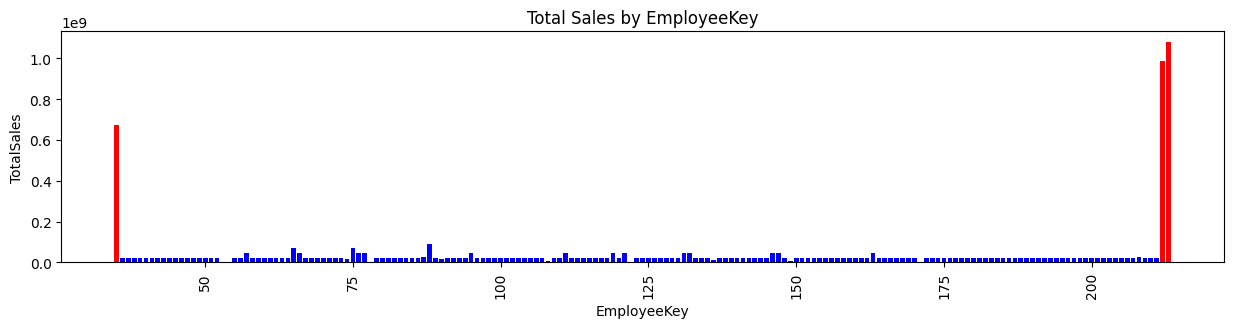

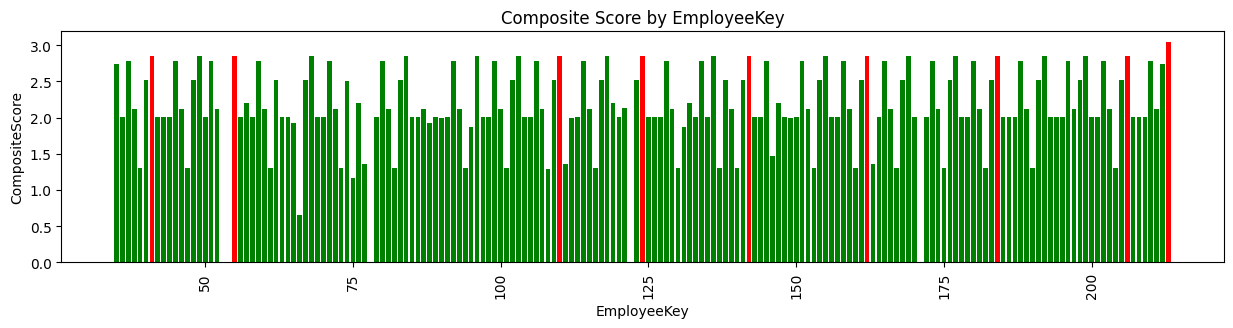

In [61]:
import matplotlib.pyplot as plt

# Assuming top_performing_managers is your DataFrame with EmployeeKey, TotalSales, and CompositeScore columns
# Create a bar chart for TotalSales with conditional coloring
plt.figure(figsize=(15, 3))
colors = ['red' if x > 600000000 else 'blue' for x in top_performing_managers['TotalSales']]
plt.bar(top_performing_managers['EmployeeKey'], top_performing_managers['TotalSales'], color=colors)
plt.xlabel('EmployeeKey')
plt.ylabel('TotalSales')
plt.title('Total Sales by EmployeeKey')
plt.xticks(rotation=90)
plt.show()

# Create a bar chart for CompositeScore with conditional coloring
plt.figure(figsize=(15, 3))
colors = ['red' if x > 2.85 else 'green' for x in top_performing_managers['CompositeScore']]
plt.bar(top_performing_managers['EmployeeKey'], top_performing_managers['CompositeScore'], color=colors)
plt.xlabel('EmployeeKey')
plt.ylabel('CompositeScore')
plt.title('Composite Score by EmployeeKey')
plt.xticks(rotation=90)
plt.show()


Question:
Contoso would like to offer managerial training programs for top performers and sales
strategy training programs for other store managers who require them and are in the
US Geographical Area. Could you please make recommendations as to who needs the
former and who needs the latter and justify your choices with facts and figures.

Answer:
a. If we purely only at the Sales figures then the top performing store managers are Jan Dryml, Ben Smith and Roy Antebi are best performing store managers and could be given the managerial training programs, but looking at purely the performance Jan Dryml, Ed Banti, Kelly Rollin, Michel Periera, Michiyo Sato , Ashima	Singhal, Ekaterina	Podkolzina, Ties Arts and April	Reagan can be offered the Managerial training programs.
b. While other store managers in the US region can be given the Strategy Training Program.